In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data_files_paths = '../02 Data/Original Data/Airbnb Amsterdam/'

In [2]:
# Import files into pandas DataFrames
calendar = pd.read_csv(data_files_paths + 'calendar.csv')
listings = pd.read_csv(data_files_paths + 'listings.csv')
reviews_details = pd.read_csv(data_files_paths + 'reviews_details.csv')
neighbourhoods_geojson = pd.read_json(data_files_paths + 'neighbourhoods.geojson')
reviews = pd.read_csv(data_files_paths + 'reviews.csv')
listings_details = pd.read_csv(data_files_paths + 'listings_details.csv')
neighbourhoods = pd.read_csv(data_files_paths + 'neighbourhoods.csv')

/var/folders/1t/82zy_nkj13dg65kz31p835s00000gn/T/ipykernel_45887/2376884974.py:7: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  listings_details = pd.read_csv(data_files_paths + 'listings_details.csv')


In [3]:
# Convert columns from mix type to the best possible data types
listings_details = listings_details.convert_dtypes()

## Q2 Using the questions defined in the previous task to pick out variables from the data set suitable for exploratory visual analysis

In [116]:
# Select relevant columns from listings and listings_details
listings_columns = ['id', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'number_of_reviews', 'availability_365']
listings_details_columns = ['id', 'host_response_time', 'host_is_superhost', 'property_type', 'accommodates', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

# Extract the relevant columns
listings_filtered = listings[listings_columns]
listings_details_filtered = listings_details[listings_details_columns]

# Merge the DataFrames
merged_listings = pd.merge(listings_filtered, listings_details_filtered, on='id')

In [83]:
listings_details.shape

(20030, 96)

## Q3 Creating a correlation matrix heatmap

In [9]:
merged_listings_numeric_corr = merged_listings_numeric.corr()

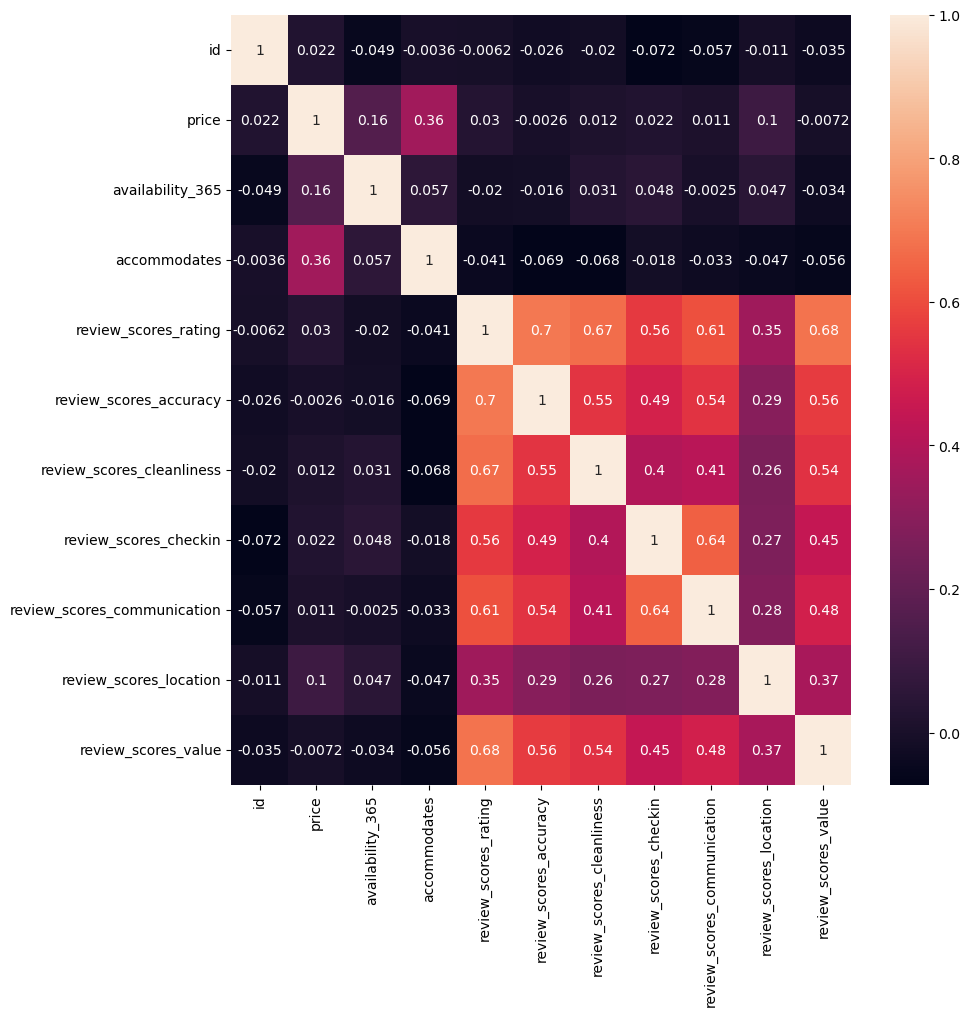

In [84]:
# Drop non-numeric columns
merged_listings_numeric = merged_listings.select_dtypes(include=[np.number])

# Create a subplot with matplotlib
f, ax = plt.subplots(figsize=(10, 10))

# Create the correlation heatmap using seaborn
corr = sns.heatmap(merged_listings_numeric_corr, annot=True, ax=ax)

# Show the plot
plt.show()

a. The location of a listing (neighborhood) has a significant impact on its price and demand.

The correlation matrix does not include information on the neighborhood variable as it is a non-numeric categorical variable. However, we can observe the correlation between review_scores_location and price (0.100) which indicates a weak positive relationship. This suggests that listings with higher location scores might be associated with slightly higher prices. Further analysis would be needed to assess the impact of specific neighborhoods on price and demand.

b. The type of accommodation (room type, property type) influences pricing and customer preferences.

The room type and property type variables are not included in the correlation matrix as they are categorical variables. However, we can observe the correlation between accommodates and price (0.357), which indicates a moderate positive relationship. This suggests that larger accommodations (with more capacity) are generally associated with higher prices. To analyze the impact of room type and property type, further analysis is needed, such as converting the categorical variables into dummy variables or using other techniques for categorical data.

c. Host-related factors (e.g., response time, experience, and superhost status) may affect listing performance.

The host-related factors mentioned in the question are not present in the correlation matrix as they are categorical variables. To analyze the impact of these factors, we would need to include them in the correlation matrix, likely by converting them into dummy variables or employing other techniques for categorical data.

d. Analyzing reviews can provide insights into factors that influence customer satisfaction and contribute to a listing's success.

The correlation matrix includes several review-related variables (e.g., review_scores_rating, review_scores_accuracy, review_scores_cleanliness, etc.). These variables exhibit moderate to strong positive correlations with one another, which suggests that high scores in one aspect tend to be associated with high scores in other aspects. For instance, review_scores_rating has a strong positive correlation with review_scores_value (0.684), suggesting that listings with higher overall ratings tend to provide better value for money. To further explore the factors that influence customer satisfaction and listing success, additional analysis could be performed using these variables.

## Q4 Create a scatterplot (or plots) for the variables with the strongest correlations

In [92]:
# Convert columns to numeric data types
for col in ['review_scores_rating', 'review_scores_value', 'review_scores_accuracy']:
    merged_listings_numeric[col] = pd.to_numeric(merged_listings_numeric[col])

# Remove rows with missing values in relevant columns
#merged_listings_cleaned = merged_listings_numeric.dropna(subset=['review_scores_rating', 'review_scores_value', 'review_scores_accuracy'])



In [93]:
# Checking missing values
merged_listings_numeric.isnull().sum()

id                                0
price                             0
availability_365                  0
accommodates                      0
review_scores_rating           2639
review_scores_accuracy         2649
review_scores_cleanliness      2647
review_scores_checkin          2661
review_scores_communication    2652
review_scores_location         2660
review_scores_value            2659
dtype: int64

In [69]:
merged_listings_numeric.shape

(20030, 11)

In [94]:
# Remove rows with missing values in relevant columns
merged_listings_numeric.dropna(inplace=True)
merged_listings_numeric.shape

(17363, 11)

In [95]:
# Double checking missing values
merged_listings_numeric.isnull().sum()

id                             0
price                          0
availability_365               0
accommodates                   0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
dtype: int64

In [108]:
lst = ['review_scores_rating', 'review_scores_value', 'review_scores_accuracy']
merged_listings_numeric_filtered = merged_listings_numeric[merged_listings_numeric.columns.intersection(lst)]

In [109]:
# Type custing to prevent seaborn error
merged_listings_numeric_filtered =  merged_listings_numeric_filtered.astype(float)

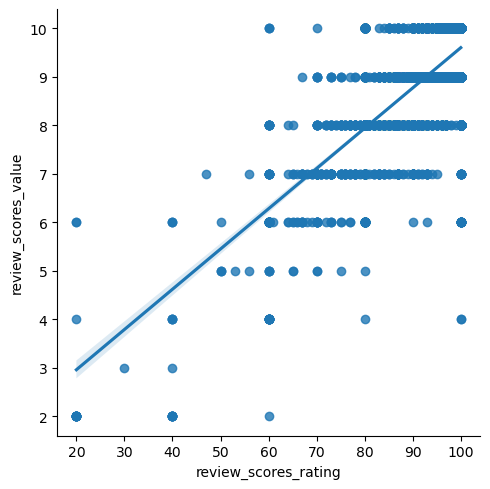

In [113]:
# Scatterplot for review_scores_rating and review_scores_value
sns.lmplot(x='review_scores_rating', y='review_scores_value', data=merged_listings_numeric_filtered)

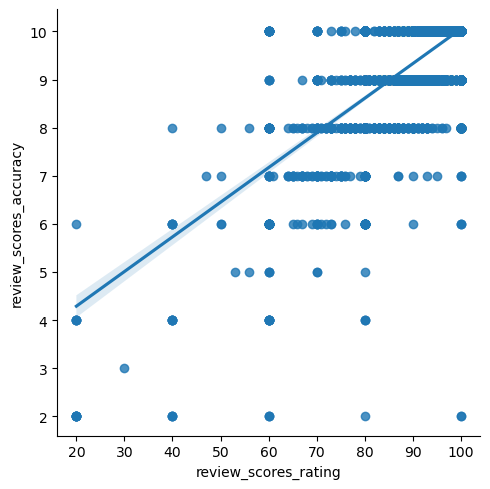

In [111]:
# Scatterplot for review_scores_rating and review_scores_accuracy
sns.lmplot(x='review_scores_rating', y='review_scores_accuracy', data=merged_listings_numeric_filtered)

 ### Columns description:

review_scores_rating: This column represents the overall rating score for a listing. It is likely based on a scale, such as 0 to 100, with higher numbers indicating better ratings. In this dataset, the mean rating is around 94.85, with the lowest score being 20 and the highest being 100.

review_scores_accuracy: This column represents the accuracy score of a listing. This score typically reflects how accurately the listing is described, including features, amenities, and location. It seems to be based on a scale of 1 to 10, with higher numbers indicating better accuracy. In this dataset, the mean accuracy score is around 9.68, with the lowest score being 2 and the highest being 10.

review_scores_value: This column represents the value score of a listing. This score generally reflects how guests perceive the value they receive for the price they paid. Like the accuracy score, it appears to be based on a scale of 1 to 10, with higher numbers indicating better value. In this dataset, the mean value score is around 9.17, with the lowest score being 2 and the highest being 10.
These scores help potential guests assess the quality of a listing and make informed decisions when booking accommodations. Hosts can use this feedback to improve their listings and increase customer satisfaction.

### Observations:

The data are homogeneously arranged mainly in the upper right part of the graph. 
The correlation is moderately strong. But the distribution of the ratio of review_scores_rating scores can be +/- 20 points relative to one individual score 'review_scores_value', 'review_scores_accuracy' on a scale of 1 to 10 points. Which means that rating can change moderately even with high quality of profile filling and good customer feedback.

## Q5 pair plot

#### d) Analyzing reviews can provide insights into factors that influence customer satisfaction and contribute to a listing's success.

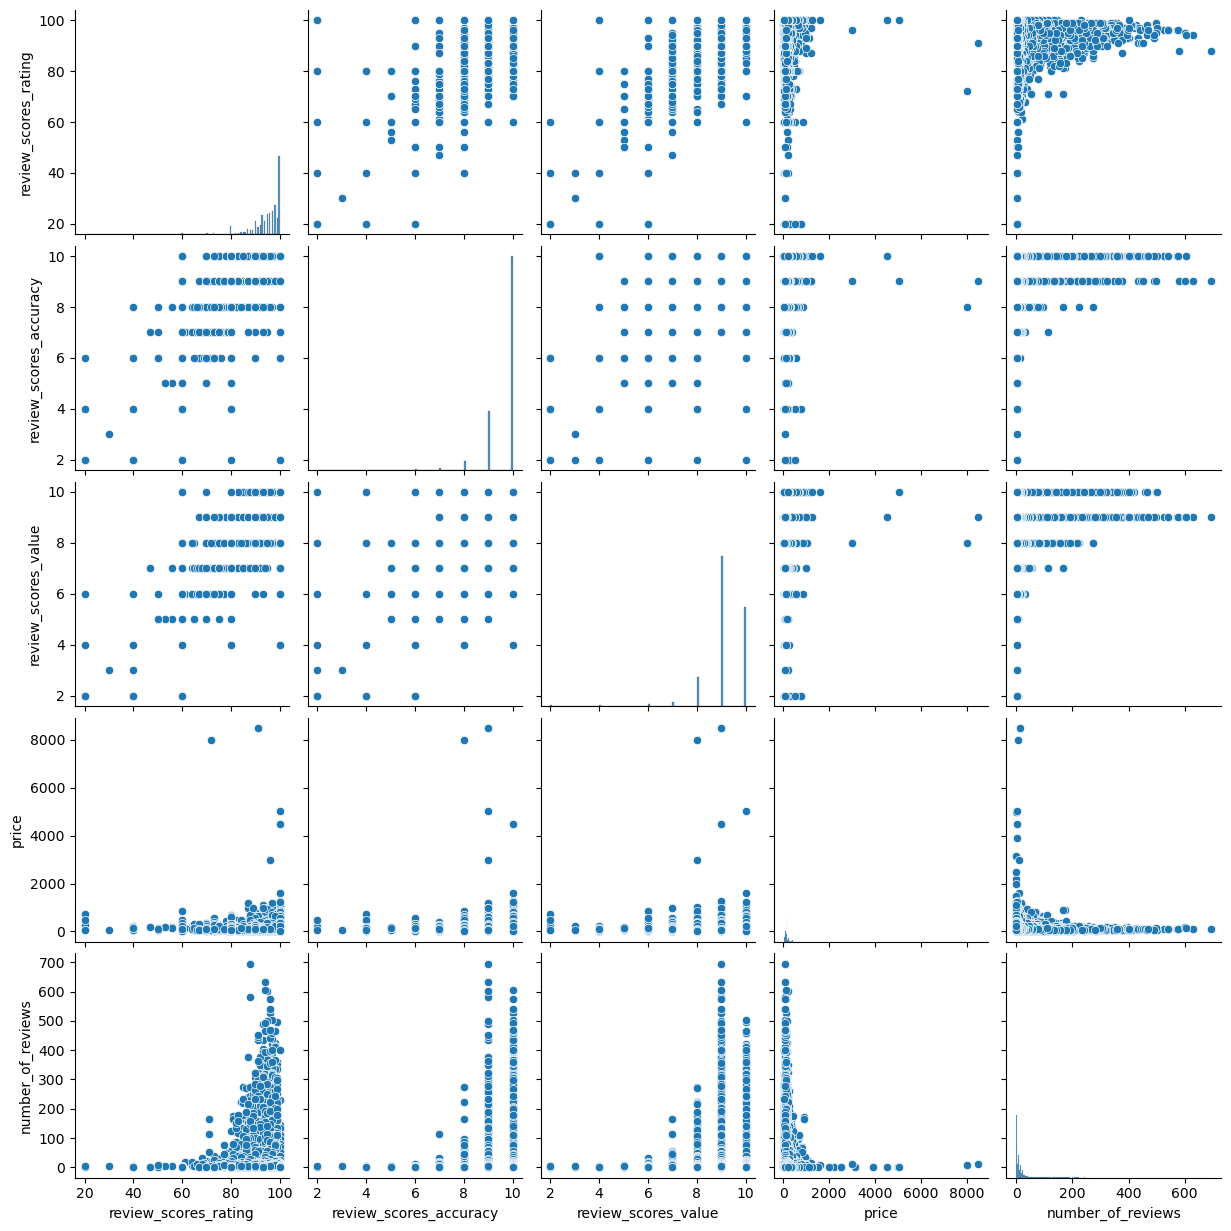

In [123]:
# Review-related variables
review_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_value', 'price', 'number_of_reviews']
review_dataset = merged_listings[review_columns]

# Create a pair plot
g4 = sns.pairplot(review_dataset)

### Observations:
The largest number of reviews with a rating of 9, in second place 10, also the overwhelming number of reviews with a rating of more than 80
Price is mostly no more than 2000, but there are a few drop down prices.

## Q5 Categorical plot

### 1. Hypothesis: The location of a listing (neighborhood) has a significant impact on its price and demand.
#### Question 1: Which neighborhoods have the highest and lowest average prices for listings?

[Text(0, 0, 'Oostelijk Havengebied - Indische Buurt'),
 Text(1, 0, 'Westerpark'),
 Text(2, 0, 'Centrum-Oost'),
 Text(3, 0, 'Centrum-West'),
 Text(4, 0, 'Bos en Lommer'),
 Text(5, 0, 'Zuid'),
 Text(6, 0, 'De Pijp - Rivierenbuurt'),
 Text(7, 0, 'De Baarsjes - Oud-West'),
 Text(8, 0, 'Oud-Oost'),
 Text(9, 0, 'Slotervaart'),
 Text(10, 0, 'Gaasperdam - Driemond'),
 Text(11, 0, 'Oud-Noord'),
 Text(12, 0, 'Noord-Oost'),
 Text(13, 0, 'Watergraafsmeer'),
 Text(14, 0, 'IJburg - Zeeburgereiland'),
 Text(15, 0, 'Geuzenveld - Slotermeer'),
 Text(16, 0, 'Buitenveldert - Zuidas'),
 Text(17, 0, 'Bijlmer-Oost'),
 Text(18, 0, 'Noord-West'),
 Text(19, 0, 'De Aker - Nieuw Sloten'),
 Text(20, 0, 'Osdorp'),
 Text(21, 0, 'Bijlmer-Centrum')]

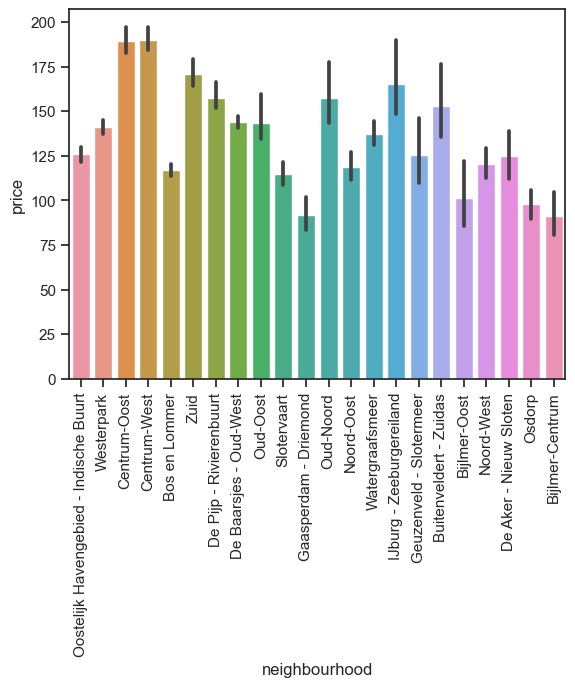

In [129]:
# Create a barplot to visualize average prices per neighborhood
sns.set(style="ticks")
g = sns.barplot(x="neighbourhood", y="price", data=merged_listings)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

### Answers: 
Gaasperdam - Driemond has the lowest price

Centrum-Ost, Centrum-West has the highest price

### 2. Hypothesis: The type of accommodation (room type, property type) influences pricing and customer preferences.
#### Question 2: How do prices vary between different room types (e.g., private room, entire home, shared room)?

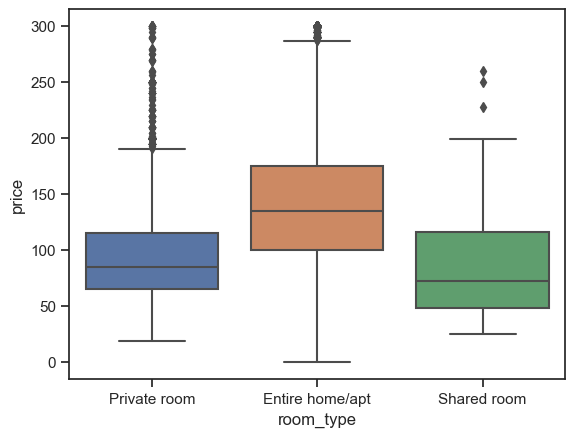

In [136]:
# Calculate the 95th percentile of the price column
price_threshold = merged_listings['price'].quantile(0.95)

# Filter the data by removing listings with a price above the threshold
filtered_by_price_listings = merged_listings[merged_listings['price'] <= price_threshold]

# Create a box plot to visualize price distribution for each room type without outliers
sns.set(style="ticks")
g = sns.boxplot(x="room_type", y="price", data=filtered_by_price_listings)

### Answers: 

The catigory with the highest price is Entire home / appartment.

### 3. Hypothesis: Host-related factors (e.g., response time, experience, and superhost status) may affect listing performance.
#### Question 3: Do listings with superhosts have higher prices and demand compared to listings with non-superhosts?

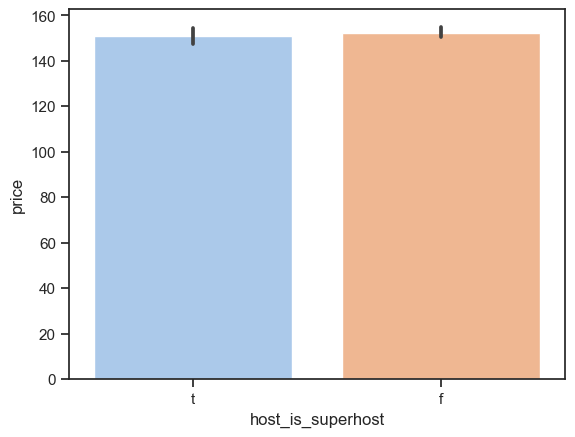

In [138]:
# Create a bar plot to visualize average price per superhost status with the 'pastel' color scheme
g1 = sns.barplot(x="host_is_superhost", y="price", data=merged_listings, palette='pastel')

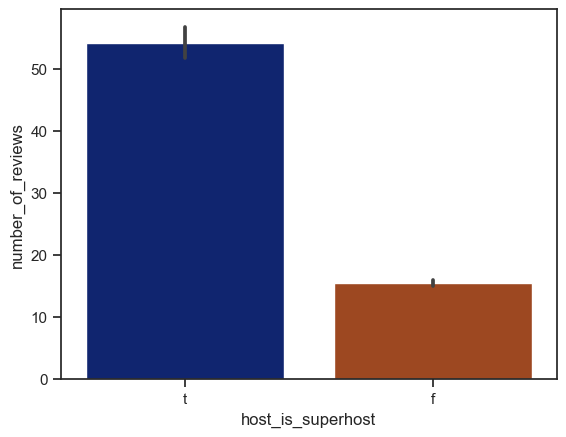

In [139]:
# Create a bar plot to visualize average number_of_reviews per superhost status with the 'dark' color scheme
g2 = sns.barplot(x="host_is_superhost", y="number_of_reviews", data=merged_listings, palette='dark')

### Answers:
The price does not differ because of whether the listing is a superhost or not

The number of reviews is three times higher for superhosts

### 4. Hypothesis: Analyzing reviews can provide insights into factors that influence customer satisfaction and contribute to a listing's success.
#### Question 4: Is there a correlation between review scores (e.g., rating, accuracy, value) and the price of a listing?

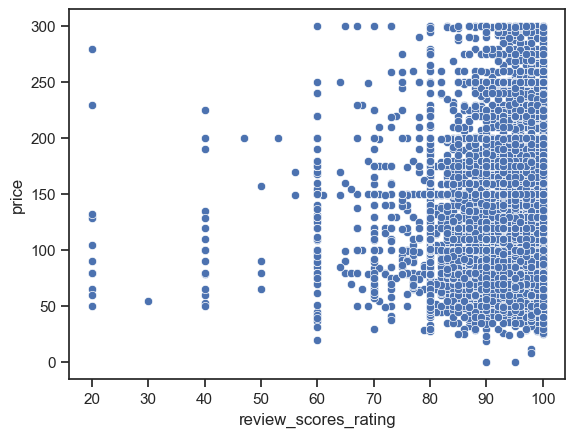

In [140]:
# Create a scatter plot to visualize the relationship between review scores and price
g1 = sns.scatterplot(x="review_scores_rating", y="price", data=filtered_by_price_listings)

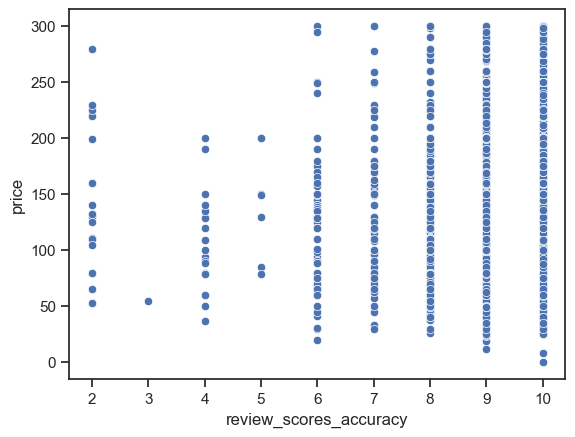

In [141]:
g2 = sns.scatterplot(x="review_scores_accuracy", y="price", data=filtered_by_price_listings)

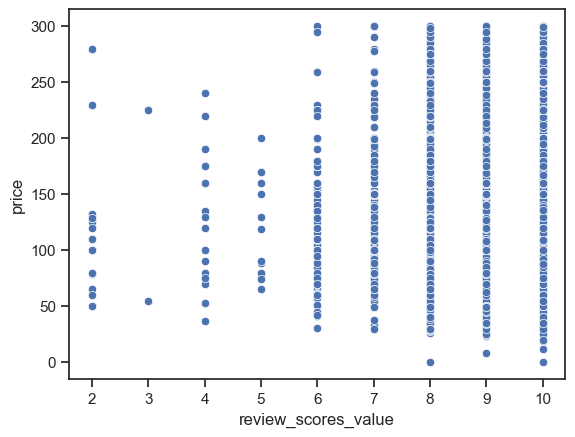

In [142]:
g3 = sns.scatterplot(x="review_scores_value", y="price", data=filtered_by_price_listings)

### Answers:
There is low correlation bitween price and review_scores_rating, review_scores_accuracy and review_scores_value